In [2]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf


In [9]:
# Import and read the charity_data.csv.
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")

print(application_df.head())  # This will show the first few rows of the data
print(application_df.columns)  # Check the exact column names


        EIN                                      NAME APPLICATION_TYPE  \
0  10520599              BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1  10531628    AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2  10547893        ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3  10553066            SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4  10556103  GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     

In [7]:
print(application_df.columns)


Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')


In [10]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
# Strip any extra spaces in the column names
application_df.columns = application_df.columns.str.strip()

# Drop the non-beneficial ID columns, 'EIN' and 'NAME'
application_df = application_df.drop(columns=["EIN", "NAME"])

# Check the first few rows to ensure the drop worked
print(application_df.head())



  APPLICATION_TYPE       AFFILIATION CLASSIFICATION      USE_CASE  \
0              T10       Independent          C1000    ProductDev   
1               T3       Independent          C2000  Preservation   
2               T5  CompanySponsored          C3000    ProductDev   
3               T3  CompanySponsored          C2000  Preservation   
4               T3       Independent          C1000     Heathcare   

   ORGANIZATION  STATUS     INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  \
0   Association       1              0                      N     5000   
1  Co-operative       1         1-9999                      N   108590   
2   Association       1              0                      N     5000   
3         Trust       1    10000-24999                      N     6692   
4         Trust       1  100000-499999                      N   142590   

   IS_SUCCESSFUL  
0              1  
1              1  
2              0  
3              1  
4              1  


In [11]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_type_counts = application_df['APPLICATION_TYPE'].value_counts()

# Choose a cutoff value and create a list of application types to be replaced
cutoff = 500
application_types_to_replace = application_type_counts[application_type_counts < cutoff].index

# Replace in dataframe to "Other"
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app, "Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()


,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
Other,276


In [12]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
classification_counts = application_df['CLASSIFICATION'].value_counts()

# Choose a cutoff value and create a list of classifications to be replaced
cutoff = 100
classifications_to_replace = classification_counts[classification_counts < cutoff].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls, "Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()


,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
Other,669
C1700,287
C4000,194


In [13]:
application_df = pd.get_dummies(application_df)
application_df.head()


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,108590,1,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,1,5000,0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,1,6692,1,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,1,142590,1,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [15]:
# Split the data into features (X) and target (y)
X = application_df.drop(columns=["IS_SUCCESSFUL"])  # All columns except the target
y = application_df["IS_SUCCESSFUL"]  # The target column

# Split the data into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data (standardize it) using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [19]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=128, activation='relu', input_dim=X_train_scaled.shape[1]))
nn.add(tf.keras.layers.Dropout(0.4))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=64, activation='relu'))
nn.add(tf.keras.layers.Dropout(0.4))

# Third hidden layer (optional)
nn.add(tf.keras.layers.Dense(units=32, activation='relu'))
nn.add(tf.keras.layers.Dropout(0.4))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the model with an optimizer and loss function
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
nn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = nn.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6521 - loss: 0.6474 - val_accuracy: 0.7236 - val_loss: 0.5726
Epoch 2/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7233 - loss: 0.5806 - val_accuracy: 0.7238 - val_loss: 0.5645
Epoch 3/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7219 - loss: 0.5783 - val_accuracy: 0.7268 - val_loss: 0.5631
Epoch 4/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7195 - loss: 0.5733 - val_accuracy: 0.7277 - val_loss: 0.5648
Epoch 5/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7293 - loss: 0.5645 - val_accuracy: 0.7277 - val_loss: 0.5662
Epoch 6/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7274 - loss: 0.5643 - val_accuracy: 0.7238 - val_loss: 0.5619
Epoch 7/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7286 - loss: 0.5663 - val_accuracy: 0.7241 - val_loss: 0.5655
Epoch 8/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7259 - loss: 0.5679 - val_accuracy: 0.7236

In [20]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")

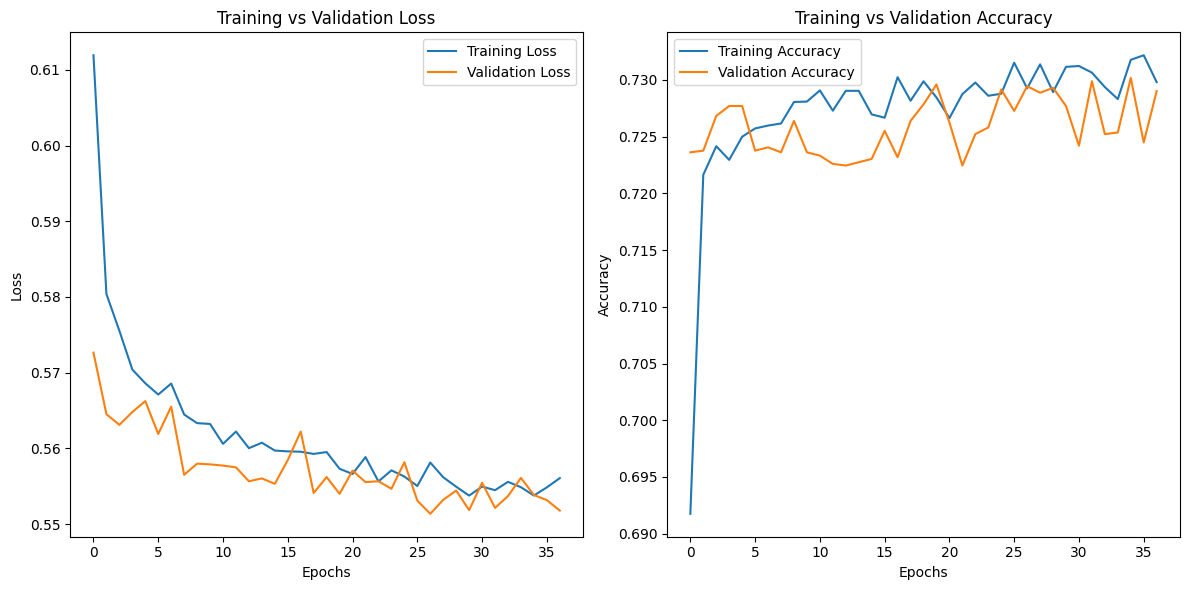

In [21]:
import matplotlib.pyplot as plt

# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Save the figure as an image (e.g., .png or .jpg)
plt.tight_layout()
plt.savefig('training_validation_performance.png')
plt.show()


# Report on the Neural Network Model
## Overview of the Analysis

Neural networks are a type of machine learning model inspired by the human brain, designed to recognize patterns and make predictions. They consist of layers of interconnected nodes, or "neurons," where each neuron processes data and passes it to the next layer. The goal of this project was to use a neural network to predict whether a charity organization would be successful based on various features like their application type, classification, and financial information.

In this project, we started with a simple neural network with two hidden layers, using **ReLU activation**. To improve the model, we added a third hidden layer, increased the number of neurons, and tested different **dropout rates** (0.2 and 0.4) to prevent overfitting. We also experimented with the **tanh activation function**, though it didn’t yield better results. We used **early stopping** to stop training early when the model’s performance stopped improving, and chose **Stochastic Gradient Descent (SGD)** as the optimizer.

Despite these optimizations, our model achieved an accuracy of **72.96%** and a loss of **0.55**, which was below the target accuracy. Through this process, we learned how tuning different aspects of the neural network, such as the number of layers, neurons, and training techniques, can impact the model’s performance.


## Data Preprocessing

### Target Variable(s)
The target variable for the model is `IS_SUCCESSFUL`, which indicates whether the organization was successful in securing funding (1 for success, 0 for failure).

### Feature Variables
The features used to train the model include variables like `APPLICATION_TYPE`, `CLASSIFICATION`, `INCOME_AMT`, `ASK_AMT`, and others. These features were selected based on their relevance to the classification task.

### Variables Removed
The columns `EIN` and `NAME` were removed from the dataset as they are unique identifiers and do not provide useful information for classification.


## Compiling, Training, and Evaluating the Model

### Model Architecture
- **Input Layer**: The input layer size is based on the number of features in the dataset (after preprocessing).
- **Hidden Layers**:
  - First hidden layer: 128 neurons with ReLU activation.
  - Second hidden layer: 64 neurons with ReLU activation.
  - Third hidden layer: 32 neurons with ReLU activation.
- **Output Layer**: The output layer consists of 1 neuron with a sigmoid activation function for binary classification.

### Model Performance
- **Accuracy**: After training the model, the accuracy achieved on the test set was approximately **72.96%**.
- **Loss**: The model’s loss was **0.55** on the test set.


### Attempts to Improve the Model
To optimize the model further, I experimented with several changes:
- **Changed the number of epochs** from 50 to 200, expecting it would allow the model to learn more effectively.
- **Tried different dropout rates**: I tested dropout rates of **0.2** and **0.4** in the hidden layers, aiming to prevent overfitting. The model's performance did not significantly change with either rate.
- **Used the SGD optimizer** with a learning rate of 0.01 and momentum of 0.9, hoping to improve the model’s convergence.
- **Added early stopping** with a patience value of 10 to stop training early if the model stopped improving.
- **Tried changing the activation function** from `relu` to `tanh` in the hidden layers, hoping it would enhance performance.
- **Added a third hidden layer** and **increased the number of neurons** in the existing layers, hoping it would improve model complexity and performance.

Despite these improvements, **none of the changes led to a significant improvement** in the model’s performance. The accuracy remained at **72.96%** and the loss remained at **0.55**, suggesting that the model might be nearing its performance limit with the given configuration.
